# sec 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sys, warnings, os
from sklearn.dummy import DummyClassifier

In [ ]:
#Setting columns and rows to display all the results
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [ ]:
#Reading the dataset
df = pd.read_csv("ufc-master.csv")

In [ ]:
label = df.Winner
#I have removed "B_Women's Featherweight_rank" because imputing with this feature in the dataset gives me a ton of errors in the baseline model.
X = df.drop(['Winner',"B_Women's Featherweight_rank"], axis =1)

In [ ]:
#Separating the features based on their data types
cat_col = [col for col in X.columns if X[col].dtypes == 'object']
num_col = [col for col in X.columns if col not in cat_col]

In [ ]:
enc = LabelEncoder()
for i in X[cat_col]:
    #using astype(str) to avoid columns with 'float and str' to throw errors
    X[i] = enc.fit_transform(X[i].astype(str))

In [ ]:
#Also encoding Label for Red to be 1 and Blue to be 0
label = [1 if win == 'Red' else 0 for win in label]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, label, random_state = 2, test_size = 0.3)

In [ ]:
X_train.isnull().sum().sort_values(ascending=False)

R_Women's Featherweight_rank    3424
B_Pound-for-Pound_rank          3401
B_Women's Flyweight_rank        3392
B_Women's Strawweight_rank      3385
R_Women's Flyweight_rank        3383
B_Bantamweight_rank             3376
B_Women's Bantamweight_rank     3372
B_Lightweight_rank              3370
B_Light Heavyweight_rank        3365
B_Featherweight_rank            3363
B_Welterweight_rank             3361
B_Flyweight_rank                3357
R_Women's Strawweight_rank      3356
B_Middleweight_rank             3354
B_Heavyweight_rank              3349
R_Women's Bantamweight_rank     3343
R_Featherweight_rank            3336
R_Bantamweight_rank             3336
R_Lightweight_rank              3333
R_Middleweight_rank             3331
R_Heavyweight_rank              3331
R_Light Heavyweight_rank        3330
R_Flyweight_rank                3329
R_Welterweight_rank             3321
R_Pound-for-Pound_rank          3320
B_match_weightclass_rank        2818
R_match_weightclass_rank        2503
b

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
imp.fit(X_train[num_col])
X_train[num_col] = imp.transform(X_train[num_col])
X_valid[num_col] = imp.transform(X_valid[num_col])

In [ ]:
cat_imp = SimpleImputer(strategy = 'most_frequent')
cat_imp.fit(X_train[cat_col])
X_train[cat_col] = cat_imp.transform(X_train[cat_col])
X_valid[cat_col] = cat_imp.transform(X_valid[cat_col])

In [ ]:
X_train.sample(10)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
3896,1338,436,-340.0,310.0,29.411765,310.000000,286,143,3,0.0,0,1,3.0,2.0,0.0,0.0,18.000,0.500000,0.5,0.500,0.375000,1.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,175.26,187.96,135.0,1.0,0.0,0.0,32.400000,0.422000,0.000000,0.800000,0.132000,3.0,2.0,11.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,1,170.18,172.72,135.0,34.0,25.0,-1.0,0.0,-2.0,-2.0,-1.0,-3.0,0.0,0.0,1.0,5.08,15.24,9.0,-14.400000,0.500000,-0.300000,0.0,1.0,12.0,0.0,2.0,0.0,5.0,0.0,8.0,6.0,0.0,3.0,10.0,10.0,8.0,3.0,4.0,6.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,2,4,31,3.0,292,900.0,210.0,565.0,2000.0,625.0,110.0,1200.0
3446,1071,554,-270.0,248.0,37.037037,248.000000,302,117,21,0.0,2,1,3.0,1.0,0.0,0.0,29.500,0.445000,0.5,3.000,0.415000,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,172.72,175.26,155.0,1.0,0.0,0.0,26.800000,0.428000,1.000000,1.200000,0.248000,4.0,1.0,13.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,4.0,1,172.72,180.34,145.0,32.0,30.0,0.0,0.0,-3.0,-3.0,0.0,-7.0,-1.0,-2.0,-1.0,0.00,-5.08,2.0,2.700000,-0.500000,1.800000,0.0,1.0,12.0,3.0,2.0,0.0,5.0,0.0,8.0,6.0,0.0,3.0,10.0,3.0,8.0,3.0,4.0,6.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,1,6,31,3.0,292,900.0,300.0,250.0,1000.0,1200.0,350.0,400.0
1339,1273,159,150.0,-170.0,150.000000,58.823529,122,71,21,0.0,7,1,3.0,0.0,0.0,0.0,0.000,0.450000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,190.50,200.66,185.0,1.0,0.0,0.0,29.846154,0.535385,0.153846,0.538462,0.249231,3.0,7.0,26.0,1.0,0.0,0.0,1.0,3.0,0.0,2.0,6.0,1,182.88,200.66,185.0,34.0,27.0,1.0,0.0,-3.0,-6.0,7.0,-26.0,-1.0,-5.0,0.0,7.62,0.00,7.0,-29.846154,-0.153846,-0.538462,0.0,1.0,12.0,14.0,2.0,0.0,5.0,0.0,8.0,6.0,14.0,3.0,10.0,10.0,8.0,3.0,4.0,6.0,9.0,15.0,9.0,6.0,10.0,12.0,1.0,7.0,9.0,12.0,4.0,1,1,24,3.0,85,692.0,-125.0,250.0,300.0,1600.0,700.0,225.0
4616,903,452,-460.0,365.0,21.739130,365.000000,198,124,21,0.0,0,1,3.0,0.0,0.0,0.0,0.000,0.500000,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,170.18,175.26,135.0,0.0,0.0,0.0,31.000000,0.460000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,175.26,177.80,135.0,20.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
base_model = DummyClassifier(random_state=2)

In [ ]:
base_model.fit(X_train,y_train)

DummyClassifier(random_state=2)

In [ ]:
preds = base_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.5867937372362151

In [ ]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
#Encoding label so it is easier to find correlation
df['Winner'] = [1 if winner == 'Red' else 0 for winner in df.Winner]

In [ ]:
df = df[df['gender'] == 'MALE']

In [ ]:
num_corr_col = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
corr_dict = {}
#Getting absolute values of correlation since we would need to inspect negative correlation too
for col in num_corr_col:
    corr_dict[col] = abs(df[col].corr(df['Winner']))

In [ ]:
for w in sorted(corr_dict, key=corr_dict.get):
    print(w, corr_dict[w])

B_win_by_Submission 0.000824570442406622
R_Height_cms 0.0016277680137514433
R_Weight_lbs 0.0026353948334274834
sub_dif 0.003303633437241906
empty_arena 0.004234791471225828
R_win_by_Submission 0.004562654796362771
B_avg_SUB_ATT 0.00575572494039087
R_draw 0.006175716063406249
R_win_by_Decision_Unanimous 0.007087453007788625
B_wins 0.008342720252229227
B_longest_win_streak 0.009771068517955839
total_title_bout_dif 0.010327174344073643
B_win_by_Decision_Majority 0.012541871279658036
B_win_by_TKO_Doctor_Stoppage 0.012783498641786172
B_avg_TD_pct 0.01318738309051308
R_Welterweight_rank 0.016217480197097452
B_total_rounds_fought 0.016769511767153706
B_win_by_KO/TKO 0.017394095523986627
B_current_lose_streak 0.017898284523374528
B_Weight_lbs 0.017940876872161084
R_win_by_Decision_Majority 0.017946281541790926
R_total_title_bouts 0.018176418518793917
R_Reach_cms 0.019920414547151315
B_Middleweight_rank 0.02011719647445769
R_wins 0.02064167683273762
B_avg_SIG_STR_pct 0.02078690383286776
B_win_b

In [ ]:
#For visualization purposes
df['Winner'] = ['Red' if winner == 1 else 'Blue' for winner in df.Winner]

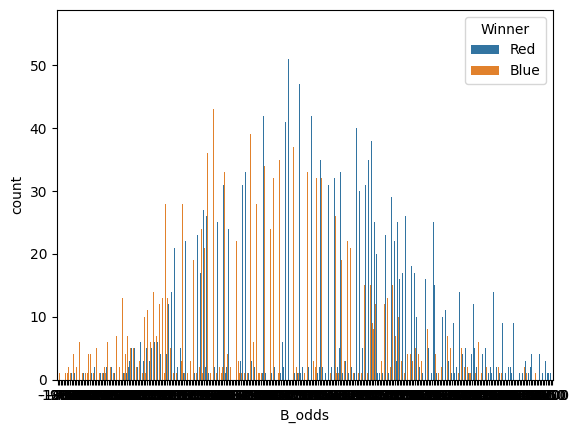

In [ ]:
sns.countplot(x=df['B_odds'], hue = df['Winner']);

Text(0.5, 1.0, 'Scatter Plot of Red and Blue Odds')

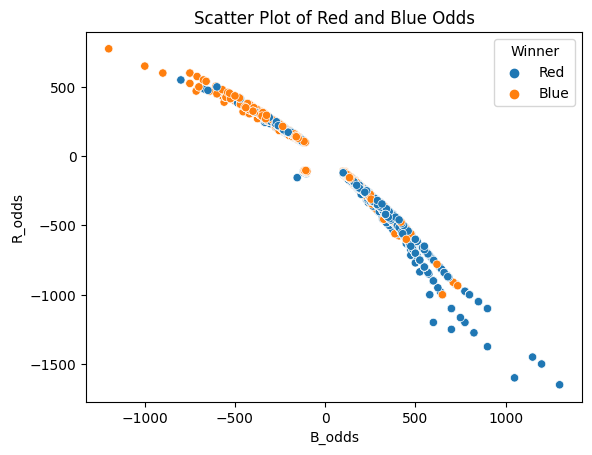

In [ ]:
sns.scatterplot(x="B_odds", y="R_odds", hue="Winner", data = df);
plt.title("Scatter Plot of Red and Blue Odds")

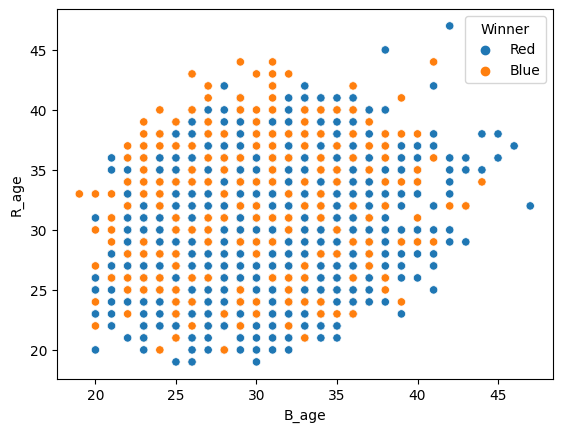

In [ ]:
sns.scatterplot(x="B_age", y="R_age", hue="Winner", data = df);

In [ ]:
#Just to be sure
df["Winner"].loc[df["B_odds"]>1].value_counts()

Red     1852
Blue     836
Name: Winner, dtype: int64

Text(0.5, 1.0, 'Scatter Plot of Red and Blue Ev')

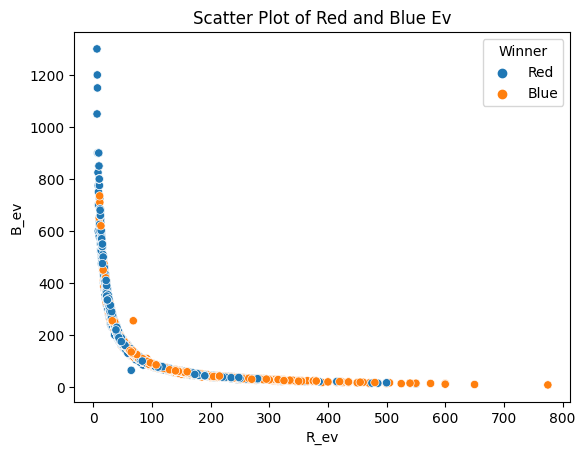

In [ ]:
sns.scatterplot(x='R_ev',y='B_ev',hue = 'Winner', data=df);
plt.title("Scatter Plot of Red and Blue Ev")

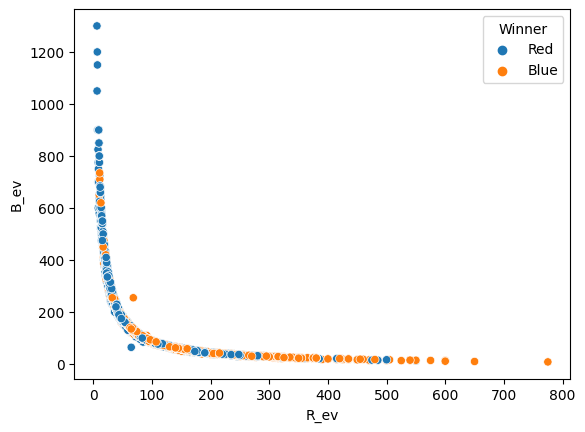

In [ ]:
sns.scatterplot(x='R_ev',y='B_ev',hue = 'Winner', data=df);

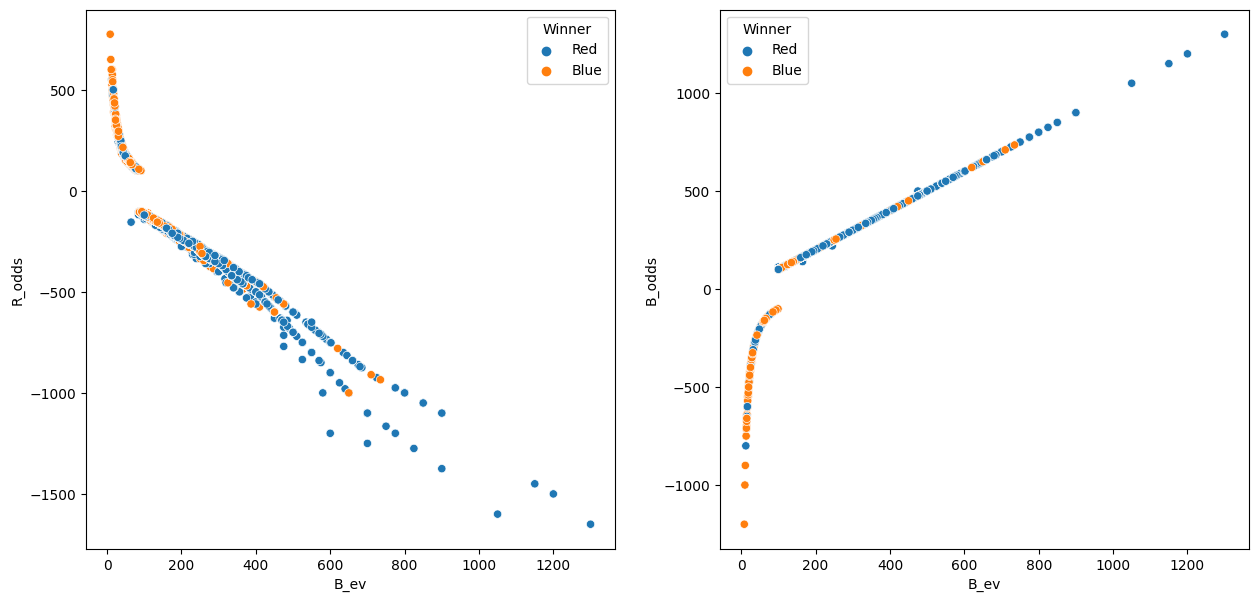

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(x='B_ev', y='R_odds',hue = 'Winner', data=df, ax=ax[0]);
sns.scatterplot(x='B_ev', y='B_odds',hue = 'Winner', data=df, ax=ax[1]);
fig.show()

In [ ]:
df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Thiago Santos,Johnny Walker,-150.0,130,66.666667,130.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Light Heavyweight,MALE,5,0,1,0,3.42,0.59,0.7,0.24,1.00,4,2,11,0,0,0,1,4,0,0,5,Orthodox,198.12,208.28,205,3,0,0,3.95,0.48,0.1,0.61,0.36,4,8,43,1,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,37,29,-3,1,0,-8,-6,-32,-1,-7,0,10.16,15.24,-8,-0.53,0.6,-0.37,1,1,10.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,800.0,900.0,2000.0,1600.0,-110.0,175.0
1,Alex Oliveira,Niko Price,170.0,-200,170.000000,50.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,2,0,0,5.16,0.42,0.8,0.79,0.22,2,5,24,0,0,0,0,4,2,0,6,Orthodox,182.88,193.04,170,2,0,0,2.97,0.51,0.5,2.27,0.37,4,8,44,0,0,1,3,4,3,0,11,Orthodox,180.34,193.04,170,33,32,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,U-DEC,NaN,3.0,5:00,900.0,450.0,350.0,700.0,1100.0,550.0,120.0
2,Misha Cirkunov,Krzysztof Jotko,110.0,-130,110.000000,76.923077,2021-10-02,"Las Vegas, Nevada, USA",USA,Blue,False,Middleweight,MALE,3,1,0,0,2.92,0.41,0.1,1.15,0.34,5,5,38,0,0,2,6,1,0,0,9,Southpaw,185.42,195.58,185,1,0,0,3.77,0.49,1.7,4.48,0.44,4,4,13,0,0,0,0,1,5,0,6,Orthodox,190.50,195.58,205,34,32,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,S-DEC,NaN,3.0,5:00,900.0,550.0,275.0,275.0,1400.0,600.0,185.0
3,Alexander Hernandez,Mike Breeden,-675.0,475,14.814815,475.000000,2021-10-02,"Las Vegas, Nevada, USA",USA,Red,False,Lightweight,MALE,3,1,0,0,4.04,0.34,0.0,0.00,0.00,0,1,3,0,0,0,0,0,0,0,0,Orthodox,177.80,177.80,155,1,0,0,3.79,0.36,0.0,1.57,0.35,2,3,15,0,0,0,2,2,0,0,4,Orthodox,175.26,182.88,155,29,32,0,0,-2,-4,-2,-12,0,-2,0,2.54,-5.08,3,0.25,0.0,-1.57,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Inserting fights

In [ ]:
#Dropping betting odds columns
df.drop('b_ko_odds', axis=1, inplace=True)
df.drop('r_ko_odds', axis=1, inplace=True)
df.drop('b_sub_odds', axis=1, inplace=True)

df.drop('r_sub_odds', axis=1, inplace=True)
df.drop('r_dec_odds', axis=1, inplace=True)
df.drop('b_dec_odds', axis=1, inplace=True)
df.drop('B_match_weightclass_rank', axis=1, inplace=True)

df.drop('finish', axis=1, inplace=True)
df.drop("B_Women's Bantamweight_rank", axis=1, inplace=True)
df.drop("R_match_weightclass_rank", axis=1, inplace=True)
df.drop("R_Women's Flyweight_rank", axis=1, inplace=True)
df.drop("R_Women's Featherweight_rank", axis=1, inplace=True)
df.drop("R_Women's Strawweight_rank", axis=1, inplace=True)
df.drop("R_Women's Bantamweight_rank", axis=1, inplace=True)
df.drop('R_Heavyweight_rank', axis=1, inplace=True)
df.drop('R_Light Heavyweight_rank', axis=1, inplace=True)
df.drop('R_Middleweight_rank', axis=1, inplace=True)
df.drop('R_Welterweight_rank', axis=1, inplace=True)
df.drop("R_Lightweight_rank", axis=1, inplace=True)
df.drop("R_Featherweight_rank", axis=1, inplace=True)
df.drop('R_Bantamweight_rank', axis=1, inplace=True)
df.drop('R_Flyweight_rank', axis=1, inplace=True)
df.drop('R_Pound-for-Pound_rank', axis=1, inplace=True)
df.drop("B_Women's Flyweight_rank", axis=1, inplace=True)
df.drop("B_Women's Featherweight_rank", axis=1, inplace=True)
df.drop("B_Women's Strawweight_rank", axis=1, inplace=True)
df.drop('B_Heavyweight_rank', axis=1, inplace=True)
df.drop('B_Light Heavyweight_rank', axis=1, inplace=True)
df.drop("B_Middleweight_rank", axis=1, inplace=True)
df.drop("B_Welterweight_rank", axis=1, inplace=True)
df.drop('B_Lightweight_rank', axis=1, inplace=True)
df.drop('B_Featherweight_rank', axis=1, inplace=True)
df.drop('B_Bantamweight_rank', axis=1, inplace=True)
df.drop('B_Flyweight_rank', axis=1, inplace=True)
df.drop('B_Pound-for-Pound_rank', axis=1, inplace=True)

df.drop('total_fight_time_secs', axis=1, inplace=True)
df.drop('finish_round_time', axis=1, inplace=True)
df.drop('finish_round', axis=1, inplace=True)

df.drop('finish_details', axis=1, inplace=True)
df.drop('empty_arena', axis=1, inplace=True)
df.drop('location', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)

In [ ]:
for col in df.columns:
    print(col)

R_fighter
B_fighter
R_odds
B_odds
R_ev
B_ev
date
Winner
title_bout
weight_class
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_landed
B_avg_TD_pct
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Stance
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_draw
R_avg_SIG_STR_landed
R_avg_SIG_STR_pct
R_avg_SUB_ATT
R_avg_TD_landed
R_avg_TD_pct
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Stance
R_Height_cms
R_Reach_cms
R_Weight_lbs
R_age
B_age
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_dif
total_round_dif
tota

In [ ]:
#Colby VS Leon

new_record = {
'R_fighter': 'Leon Edwards',
'B_fighter': 'Colby Covington',
'R_odds': -150,
'B_odds': 120,
'R_ev': 66.67,
'B_ev': 120,
'date': 'NaN',
'Winner': 'NaN',
'title_bout': True,
'weight_class': 'Welterweight',
'no_of_rounds': 5,
'B_current_lose_streak': 0,
'B_current_win_streak': 1,
'B_draw': 0,
'B_avg_SIG_STR_landed': 4.10,
'B_avg_SIG_STR_pct': .39,
'B_avg_SUB_ATT': 0.2,
'B_avg_TD_landed': 4.05,
'B_avg_TD_pct': 0.45,
'B_longest_win_streak': 7,
'B_losses': 3,
'B_total_rounds_fought': 'NaN',
'B_total_title_bouts': 3,
'B_win_by_Decision_Majority': 0,
'B_win_by_Decision_Split': 0,
'B_win_by_Decision_Unanimous': 7,
'B_win_by_KO/TKO': 4,
'B_win_by_Submission': 4,
'B_win_by_TKO_Doctor_Stoppage': 0,
'B_wins': 17,
'B_Stance': 'Orthodox',
'B_Height_cms': 180.33,
'B_Reach_cms': 72,
'B_Weight_lbs': 170,
'R_current_lose_streak': 0,
'R_current_win_streak': 9,
'R_draw': 0,
'R_avg_SIG_STR_landed': 2.80,
'R_avg_SIG_STR_pct': 0.53,
'R_avg_SUB_ATT': 0.34,
'R_avg_TD_landed': 1.26,
'R_avg_TD_pct': 0.33,
'R_longest_win_streak': 9,
'R_losses': 3,
'R_total_rounds_fought': 'NaN',
'R_total_title_bouts': 2,
'R_win_by_Decision_Majority': 1,
'R_win_by_Decision_Split': 1,
'R_win_by_Decision_Unanimous': 7,
'R_win_by_KO/TKO': 7,
'R_win_by_Submission': 3,
'R_win_by_TKO_Doctor_Stoppage': 0,
'R_wins': 21,
'R_Stance': 'Southpaw',
'R_Height_cms': 187.96,
'R_Reach_cms': 74,
'R_Weight_lbs': 170,
'R_age': 32,
'B_age': 35,
'lose_streak_dif': 0,
'win_streak_dif': -8,
'longest_win_streak_dif': -2,
'win_dif': -4,
'loss_dif': 0,
'total_round_dif': 'NaN',
'total_title_bout_dif': 1,
'ko_dif': -3,
'sub_dif': 1,
'height_dif': -7.6,
'reach_dif': -2,
'age_dif': 3,
'sig_str_dif': -0.14,
'avg_sub_att_dif': 'NaN',
'avg_td_dif': 0.12,
'constant_1': 'NaN',
'better_rank': 'NaN',
}
df = df.append(new_record, ignore_index=True)
df.tail()

<ipython-input-749-414fbc8ae9e2>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_record, ignore_index=True)


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,constant_1,better_rank
4380,John Howard,Daniel Roberts,-210.0,175,47.619048,175.0,3/21/2010,Red,False,Welterweight,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Southpaw,177.80,187.96,170,0,3,0,18.000000,0.550000,1.000000,4.666667,0.790,3,0,9,0,0,2,0,1,0,0,3,Orthodox,170.18,180.34,170,27,29,0,-3,-3,-3,0,-9,0,-1,0,7.62,7.62,-2,-18.00,-1.0,-4.666667,1,neither
4381,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.0,3/21/2010,Red,False,Heavyweight,3,1,0,0,8.000000,0.34,1.000000,1.000000,1.00,0,1,1,0,0,0,0,0,0,0,0,Orthodox,190.50,196.00,265,1,0,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,1,1,0,0,0,0,0,0,0,Orthodox,193.04,198.12,245,27,27,0,0,0,0,0,0,-1,0,0,-2.54,-2.12,0,-4.00,1.0,1.000000,1,neither
4382,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.0,3/21/2010,Red,False,Welterweight,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,Orthodox,182.88,185.42,170,1,0,0,40.500000,0.405000,0.000000,3.500000,0.520,1,1,6,0,0,0,1,0,0,0,1,Orthodox,172.72,177.80,170,29,34,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.50,0.0,-3.500000,1,neither
4383,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.5,3/21/2010,Blue,False,Light Heavyweight,3,1,0,0,31.666667,0.46,0.666667,1.666667,0.50,2,1,8,0,0,0,1,1,0,0,2,Orthodox,180.34,180.34,205,1,0,0,15.666667,0.588333,1.333333,0.833333,0.145,2,3,9,0,0,0,0,1,2,0,3,Orthodox,190.50,190.50,185,32,34,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.00,-0.666667,0.833333,1,neither
4384,Leon Edwards,Colby Covington,-150.0,120,66.670000,120.0,NaN,NaN,True,Welterweight,5,0,1,0,4.100000,0.39,0.200000,4.050000,0.45,7,3,NaN,3,0,0,7,4,4,0,17,Orthodox,180.33,72.00,170,0,9,0,2.800000,0.530000,0.340000,1.260000,0.330,9,3,NaN,2,1,1,7,7,3,0,21,Southpaw,187.96,74.00,170,32,35,0,-8,-2,-4,0,NaN,1,-3,1,-7.60,-2.00,3,-0.14,NaN,0.120000,NaN,NaN


In [ ]:
#Pantoja vs Royyval

new_record = {
'R_fighter': 'Alexandre Pantoja',
'B_fighter': 'Brandon Royval',
'R_odds': -190,
'B_odds': 145,
'R_ev': 52.63,
'B_ev': 145,
'date': 'NaN',
'Winner': 'NaN',
'title_bout': True,
'weight_class': 'Flyweight',
'no_of_rounds': 5,
'B_current_lose_streak': 0,
'B_current_win_streak': 3,
'B_draw': 0,
'B_avg_SIG_STR_landed': 3.45,
'B_avg_SIG_STR_pct': .38,
'B_avg_SUB_ATT': 2.3,
'B_avg_TD_landed': 0.66,
'B_avg_TD_pct': 1,
'B_longest_win_streak': 3,
'B_losses': 6,
'B_total_rounds_fought': 'NaN',
'B_total_title_bouts': 0,
'B_win_by_Decision_Majority': 0,
'B_win_by_Decision_Split': 0,
'B_win_by_Decision_Unanimous': 0,
'B_win_by_KO/TKO': 4,
'B_win_by_Submission': 9,
'B_win_by_TKO_Doctor_Stoppage': 0,
'B_wins': 15,
'B_Stance': 'Southpaw',
'B_Height_cms': 175.25,
'B_Reach_cms': 68,
'B_Weight_lbs': 125,
'R_current_lose_streak': 0,
'R_current_win_streak': 4,
'R_draw': 0,
'R_avg_SIG_STR_landed': 4.41,
'R_avg_SIG_STR_pct': 0.48,
'R_avg_SUB_ATT': 1.03,
'R_avg_TD_landed': 1.75,
'R_avg_TD_pct': 0.45,
'R_longest_win_streak': 4,
'R_losses': 5,
'R_total_rounds_fought': 'NaN',
'R_total_title_bouts': 1,
'R_win_by_Decision_Majority': 0,
'R_win_by_Decision_Split': 2,
'R_win_by_Decision_Unanimous': 5,
'R_win_by_KO/TKO': 8,
'R_win_by_Submission': 10,
'R_win_by_TKO_Doctor_Stoppage': 0,
'R_wins': 26,
'R_Stance': 'Orthodox',
'R_Height_cms': 165.1,
'R_Reach_cms': 68,
'R_Weight_lbs': 125,
'R_age': 31,
'B_age': 33,
'lose_streak_dif': 0,
'win_streak_dif': -8,
'longest_win_streak_dif': -2,
'win_dif': 1,
'loss_dif': 0,
'total_round_dif': 'NaN',
'total_title_bout_dif': 1,
'ko_dif': -4,
'sub_dif':-1,
'height_dif': 10.51,
'reach_dif': 0,
'age_dif': 2,
'sig_str_dif': -0.10,
'avg_sub_att_dif': 'NaN',
'avg_td_dif': 0.55,
'constant_1': 'NaN',
'better_rank': 'NaN',
}
df = df.append(new_record, ignore_index=True)
df.tail()
df.replace('NaN', np.nan, inplace=True)

<ipython-input-750-7c495049f745>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_record, ignore_index=True)


In [ ]:
df.tail()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,constant_1,better_rank
4381,Brendan Schaub,Chase Gormley,-260.0,220,38.461538,220.0,3/21/2010,Red,False,Heavyweight,3,1,0,0,8.000000,0.34,1.000000,1.000000,1.00,0,1,1.0,0,0,0,0,0,0,0,0,Orthodox,190.50,196.00,265,1,0,0,12.000000,0.250000,0.000000,0.000000,0.000,0,1,1.0,1,0,0,0,0,0,0,0,Orthodox,193.04,198.12,245,27,27,0,0,0,0,0,0.0,-1,0,0,-2.54,-2.12,0,-4.00,1.000000,1.000000,1.0,neither
4382,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.0,3/21/2010,Red,False,Welterweight,3,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,0,0,0,0,0,0,0,Orthodox,182.88,185.42,170,1,0,0,40.500000,0.405000,0.000000,3.500000,0.520,1,1,6.0,0,0,0,1,0,0,0,1,Orthodox,172.72,177.80,170,29,34,1,0,-1,-1,1,-6.0,0,0,0,10.16,7.62,-5,-40.50,0.000000,-3.500000,1.0,neither
4383,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.5,3/21/2010,Blue,False,Light Heavyweight,3,1,0,0,31.666667,0.46,0.666667,1.666667,0.50,2,1,8.0,0,0,0,1,1,0,0,2,Orthodox,180.34,180.34,205,1,0,0,15.666667,0.588333,1.333333,0.833333,0.145,2,3,9.0,0,0,0,0,1,2,0,3,Orthodox,190.50,190.50,185,32,34,0,0,0,-1,2,-1.0,0,0,-2,-10.16,-10.16,-2,16.00,-0.666667,0.833333,1.0,neither
4384,Leon Edwards,Colby Covington,-150.0,120,66.670000,120.0,NaN,NaN,True,Welterweight,5,0,1,0,4.100000,0.39,0.200000,4.050000,0.45,7,3,NaN,3,0,0,7,4,4,0,17,Orthodox,180.33,72.00,170,0,9,0,2.800000,0.530000,0.340000,1.260000,0.330,9,3,NaN,2,1,1,7,7,3,0,21,Southpaw,187.96,74.00,170,32,35,0,-8,-2,-4,0,NaN,1,-3,1,-7.60,-2.00,3,-0.14,NaN,0.120000,NaN,NaN
4385,Alexandre Pantoja,Brandon Royval,-190.0,145,52.630000,145.0,NaN,NaN,True,Flyweight,5,0,3,0,3.450000,0.38,2.300000,0.660000,1.00,3,6,NaN,0,0,0,0,4,9,0,15,Southpaw,175.25,68.00,125,0,4,0,4.410000,0.480000,1.030000,1.750000,0.450,4,5,NaN,1,0,2,5,8,10,0,26,Orthodox,165.10,68.00,125,31,33,0,-8,-2,1,0,NaN,1,-4,-1,10.51,0.00,2,-0.10,NaN,0.550000,NaN,NaN


In [ ]:
df['loss_dif'] = df['B_losses'] - df['B_losses']
df['age_dif'] = df['B_age'] - df['B_age']
df['sig_str_land_dif'] = df['B_avg_SIG_STR_landed'] - df['B_avg_SIG_STR_landed']
df['lose_streak_dif'] = df['B_current_lose_streak'] - df['R_current_lose_streak']
df['win_streak_dif'] = df['B_current_win_streak'] - df['R_current_win_streak']
df['longest_win_streak_dif'] = df['B_longest_win_streak'] - df['R_longest_win_streak']
df['total_round_dif'] = df['B_total_rounds_fought'] - df['R_total_rounds_fought']
df['height_dif'] = df['B_Height_cms'] - df['R_Height_cms']
df['reach_dif'] = df['B_Reach_cms'] - df['R_Reach_cms']
df['avg_sub_att_dif'] = df['B_avg_SUB_ATT'] - df['R_avg_SUB_ATT']
df['avg_td_landed_dif'] = df['B_avg_TD_landed'] - df['R_avg_TD_landed']
df['Avg_TD_pct_dif'] = df['B_avg_TD_pct'] - df['R_avg_TD_pct']
df['current_lose_streak_dif'] = df['B_losses'] - df['R_losses']
df['current_win_streak_dif'] = df['B_current_win_streak'] - df['R_current_win_streak']
df['avg_SIG_STR_landed_dif'] = df['B_avg_SIG_STR_landed'] - df['R_avg_SIG_STR_landed']
df['avg_SIG_STR_pct_dif'] = df['B_avg_SIG_STR_pct'] - df['R_avg_SIG_STR_pct']
df['avg_SUB_ATT_dif'] = df['B_avg_SUB_ATT'] - df['R_avg_SUB_ATT']
df['avg_TD_landed_dif'] = df['B_avg_TD_landed'] - df['R_avg_TD_landed']

In [ ]:
df['draw_diff'] = (df['B_draw']-df['R_draw'])
df['avg_sig_str_pct_diff'] = (df['B_avg_SIG_STR_pct']-df['R_avg_SIG_STR_pct'])
df['avg_TD_pct_diff'] = (df['B_avg_TD_pct']-df['B_avg_TD_pct'])
df['odds_diff'] = (df['B_odds']-df['R_odds'])
df['ev_diff'] = (df['B_ev']-df['R_ev'])
df['sig_str_landed_diff']=(df['B_avg_SIG_STR_landed']-df['R_avg_SIG_STR_landed'])
df['td_landed_bout_diff']=(df['B_avg_TD_landed']-df['R_avg_TD_landed'])
df['sub_attempts_bout_diff']=(df['B_avg_SUB_ATT']-df['R_avg_SUB_ATT'])

In [ ]:
for col in df.columns:
    print(col)

R_fighter
B_fighter
R_odds
B_odds
R_ev
B_ev
date
Winner
title_bout
weight_class
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_landed
B_avg_TD_pct
B_longest_win_streak
B_losses
B_total_rounds_fought
B_total_title_bouts
B_win_by_Decision_Majority
B_win_by_Decision_Split
B_win_by_Decision_Unanimous
B_win_by_KO/TKO
B_win_by_Submission
B_win_by_TKO_Doctor_Stoppage
B_wins
B_Stance
B_Height_cms
B_Reach_cms
B_Weight_lbs
R_current_lose_streak
R_current_win_streak
R_draw
R_avg_SIG_STR_landed
R_avg_SIG_STR_pct
R_avg_SUB_ATT
R_avg_TD_landed
R_avg_TD_pct
R_longest_win_streak
R_losses
R_total_rounds_fought
R_total_title_bouts
R_win_by_Decision_Majority
R_win_by_Decision_Split
R_win_by_Decision_Unanimous
R_win_by_KO/TKO
R_win_by_Submission
R_win_by_TKO_Doctor_Stoppage
R_wins
R_Stance
R_Height_cms
R_Reach_cms
R_Weight_lbs
R_age
B_age
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_dif
total_round_dif
tota

In [ ]:
var_drop = [
'B_odds',
'R_odds',
'B_ev',
'R_ev',
'B_current_lose_streak', 'R_current_lose_streak',
'B_current_win_streak', 'R_current_win_streak',
'B_longest_win_streak', 'R_longest_win_streak',
'B_wins', 'R_wins',
'B_losses', 'R_losses',
'B_total_rounds_fought', 'R_total_rounds_fought',
'B_total_title_bouts', 'R_total_title_bouts',
'B_win_by_KO/TKO', 'R_win_by_KO/TKO',
'B_win_by_Submission', 'R_win_by_Submission',
'B_Height_cms', 'R_Height_cms',
'B_Reach_cms', 'R_Reach_cms',
'B_age', 'R_age',
'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
'B_avg_TD_landed', 'R_avg_TD_landed',
'B_draw','B_avg_SIG_STR_pct','B_avg_TD_pct','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_TKO_Doctor_Stoppage',
'R_draw','R_avg_SIG_STR_pct','R_avg_TD_pct','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage']
df.drop(var_drop, axis=1, inplace = True)

In [ ]:
for col in df.columns:
    print(col)

R_fighter
B_fighter
date
Winner
title_bout
weight_class
no_of_rounds
B_Stance
B_Weight_lbs
R_Stance
R_Weight_lbs
lose_streak_dif
win_streak_dif
longest_win_streak_dif
win_dif
loss_dif
total_round_dif
total_title_bout_dif
ko_dif
sub_dif
height_dif
reach_dif
age_dif
sig_str_dif
avg_sub_att_dif
avg_td_dif
constant_1
better_rank
sig_str_land_dif
avg_td_landed_dif
Avg_TD_pct_dif
current_lose_streak_dif
current_win_streak_dif
avg_SIG_STR_landed_dif
avg_SIG_STR_pct_dif
avg_SUB_ATT_dif
avg_TD_landed_dif
draw_diff
avg_sig_str_pct_diff
avg_TD_pct_diff
odds_diff
ev_diff
sig_str_landed_diff
td_landed_bout_diff
sub_attempts_bout_diff


In [ ]:
comm_drop = [
'date','weight_class','B_Weight_lbs','R_Weight_lbs'
]
df.drop(comm_drop, axis=1, inplace = True)

In [ ]:
df.B_Stance.unique()

array(['Orthodox', 'Southpaw', 'Switch', nan, 'Switch ', 'Open Stance'],
      dtype=object)

In [ ]:
#It has one spelling mistake
df['B_Stance'].loc[df['B_Stance']=='Switch '] = 'Switch'

<ipython-input-759-229a2cb6b0c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['B_Stance'].loc[df['B_Stance']=='Switch '] = 'Switch'


In [ ]:
stance = ['B_Stance', 'R_Stance']

In [ ]:
for x in stance:
    df[x] = [4 if st == 'Orthodox'
                           else 3 if st == 'Southpaw'
                           else 2 if st == 'Switch'
                           else 1 for st in df[x]]
#using -1 and 1 for both red and blue so there is no misunderstanding that one variable is better than the other
df['better_rank'] = [-1 if rank == 'Red'
                               else 1 if rank == 'Blue'
                               else 0 for rank in df['better_rank']]

df['title_bout'] = [1 if tb==True else 0 for tb in df['title_bout']]

In [ ]:
df['Stance_diff'] = (df['B_Stance'] - df['R_Stance'])
df.drop(stance, axis = 1, inplace = True)

In [ ]:
df.head()

,R_fighter,B_fighter,Winner,title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,constant_1,better_rank,sig_str_land_dif,avg_td_landed_dif,Avg_TD_pct_dif,current_lose_streak_dif,current_win_streak_dif,avg_SIG_STR_landed_dif,avg_SIG_STR_pct_dif,avg_SUB_ATT_dif,avg_TD_landed_dif,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,odds_diff,ev_diff,sig_str_landed_diff,td_landed_bout_diff,sub_attempts_bout_diff,Stance_diff
0,Thiago Santos,Johnny Walker,Red,0,5,-3,1,0,-8,0,-32.0,-1,-7,0,10.16,15.24,0,-0.53,0.6,-0.37,1.0,-1,0.0,-0.37,0.64,-6,1,-0.53,0.11,0.6,-0.37,0,0.11,0.0,280.0,63.333333,-0.53,-0.37,0.6,0
1,Alex Oliveira,Niko Price,Blue,0,3,0,0,-2,-5,0,-20.0,0,0,-1,2.54,0.00,0,2.19,0.3,-1.48,1.0,0,0.0,-1.48,-0.15,-3,0,2.19,-0.09,0.3,-1.48,0,-0.09,0.0,-370.0,-120.000000,2.19,-1.48,0.3,0
2,Misha Cirkunov,Krzysztof Jotko,Blue,0,3,0,0,1,3,0,25.0,0,0,-5,-5.08,0.00,0,-0.85,-1.6,-3.33,1.0,0,0.0,-3.33,-0.10,1,0,-0.85,-0.08,-1.6,-3.33,0,-0.08,0.0,-240.0,-33.076923,-0.85,-3.33,-1.6,-1
3,Alexander Hernandez,Mike Breeden,Red,0,3,0,0,-2,-4,0,-12.0,0,-2,0,2.54,-5.08,0,0.25,0.0,-1.57,1.0,0,0.0,-1.57,-0.35,-2,0,0.25,-0.02,0.0,-1.57,0,-0.02,0.0,1150.0,460.185185,0.25,-1.57,0.0,0
4,Joe Solecki,Jared Gordon,Blue,0,3,0,-2,-2,1,0,11.0,0,1,-2,0.00,-5.08,0,2.58,-0.6,-0.31,1.0,0,0.0,-0.31,-0.13,3,-2,2.58,-0.06,-0.6,-0.31,0,-0.06,0.0,250.0,40.925926,2.58,-0.31,-0.6,0


## Random Forest

In [ ]:
#Encoding label so it is easier to find correlation
df['Winner'] = [1 if winner == 'Red' else 0 for winner in df.Winner]

In [ ]:
title_df = df[df['title_bout'] == 1]

In [ ]:
label = title_df.Winner
title_df.drop(['Winner'], axis=1, inplace = True)

<ipython-input-766-eeeace572fe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df.drop(['Winner'], axis=1, inplace = True)


In [ ]:
#Encoding the remaining categorical variables
cat_col = ['R_fighter', 'B_fighter']
enc = LabelEncoder()
for i in title_df[cat_col]:
    title_df[i] = enc.fit_transform(title_df[i])

<ipython-input-767-d6d58ac5ba77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df[i] = enc.fit_transform(title_df[i])
<ipython-input-767-d6d58ac5ba77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df[i] = enc.fit_transform(title_df[i])


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(title_df, label, test_size = 0.3, random_state=1)

In [ ]:
impute = SimpleImputer(strategy = 'mean')
impute.fit(X_train)
X_train = impute.transform(X_train)
X_valid = impute.transform(X_valid)

In [ ]:
RF_model = RandomForestClassifier(random_state=1)

In [ ]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
preds = RF_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.7288135593220338

In [ ]:
label = df.Winner
df.drop(['Winner'], axis=1, inplace = True)

In [ ]:
#Encoding the remaining categorical variables
cat_col = ['R_fighter', 'B_fighter']
enc = LabelEncoder()
for i in df[cat_col]:
    df[i] = enc.fit_transform(df[i])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(df, label, test_size = 0.3, random_state=1)

In [ ]:
#At this point all the null values are the ones that have been left empty by error/mistake and are not left empty deliberately.
#So, it would make sense to fill in these with mean rather than 0 or anything else
impute = SimpleImputer(strategy = 'mean')
impute.fit(X_train)
X_train = impute.transform(X_train)
X_valid = impute.transform(X_valid)

In [ ]:
RF_model = RandomForestClassifier(random_state=1)

In [ ]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:

# Drop the 'Winner' column from the first row for prediction
row_to_predict = df.iloc[[0]]

# Impute missing values with the mean
row_to_predict = impute.transform(row_to_predict.values.reshape(1, -1))

# Make prediction for the specific row
prediction = RF_model.predict(row_to_predict)

# Display the predicted winner
print("Predicted Winner:", prediction[0])

#Colby
#Royval
#
#
#

Predicted Winner: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
label.head()

0    1
1    0
2    0
3    1
4    0
Name: Winner, dtype: int64

In [ ]:
preds = RF_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.6382978723404256

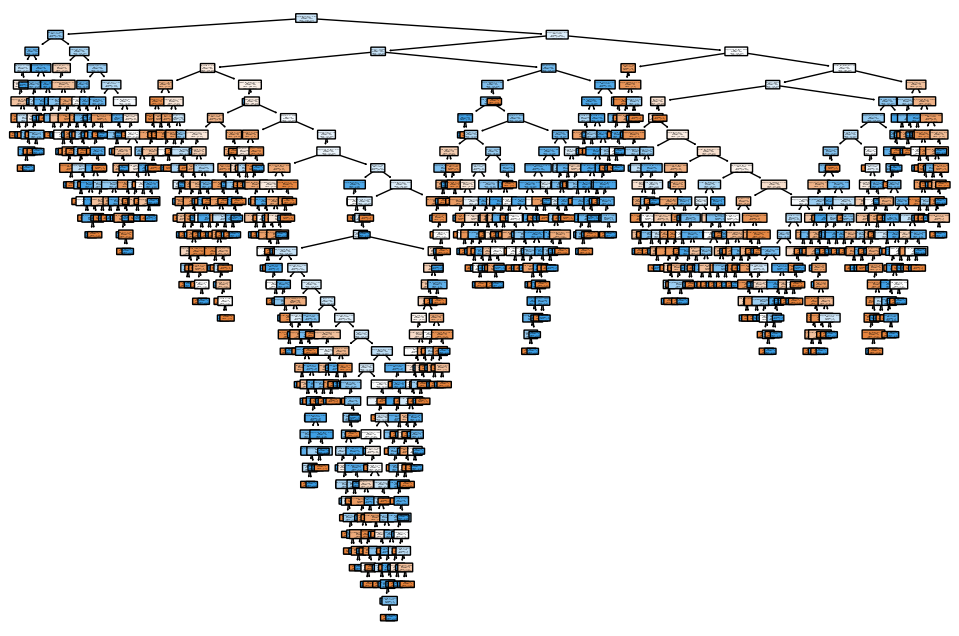

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize one of the decision trees in the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(RF_model.estimators_[0], feature_names=df.columns, class_names=['Not Winner', 'Winner'], filled=True, rounded=True)
plt.show()